**`Note For Different Value Actual and Predicted Value Graph Will Be Different `**




In [ ]:

import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('gld_price_data.csv')

In [ ]:
df1.head()
df1.info()
df1.isnull().sum()
# df1.corr()
df1.describe()
# df.corr()['GLD']
# sns.heatmap(df1.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


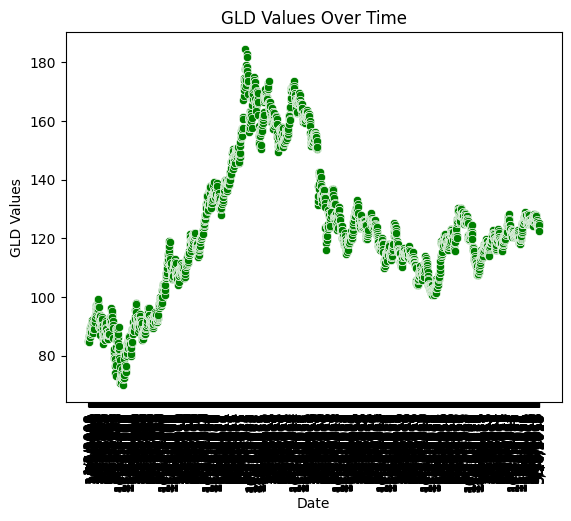

In [ ]:

sns.scatterplot(y = df1['GLD'] , x = df1['Date'] ,color='green' , data=df)
plt.title('GLD Values Over Time')
plt.xlabel('Date')
plt.ylabel('GLD Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1['GLD'].max() , df1['GLD'].min()

(184.589996, 70.0)

In [ ]:
df1

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
X = df1.drop(columns=['Date','GLD'])
y = df1['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape


((1832, 4), (458, 4), (1832,), (458,))

In [ ]:

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f'R2 Square By Linear Regression : {r2}')

print(f'Mean Squared Error By Linear Regression : {mse}')


R2 Square By Linear Regression : 0.8975640982991402
Mean Squared Error By Linear Regression : 56.165594215005996


In [ ]:

from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'R2 Square By XGBoost : {r2_xgb}')
print(f'Mean Squared Error By XGBoost : {mse_xgb}')


R2 Square By XGBoost : 0.9885715958139172
Mean Squared Error By XGBoost : 6.266192822854938


In [ ]:
# y_pred_xgb

In [ ]:

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'R2 Square By Random Forest : {r2_rf}')
print(f'Mean Squared Error By Random Forest : {mse_rf}')


R2 Square By Random Forest : 0.9890217229971514
Mean Squared Error By Random Forest : 6.019388135251344


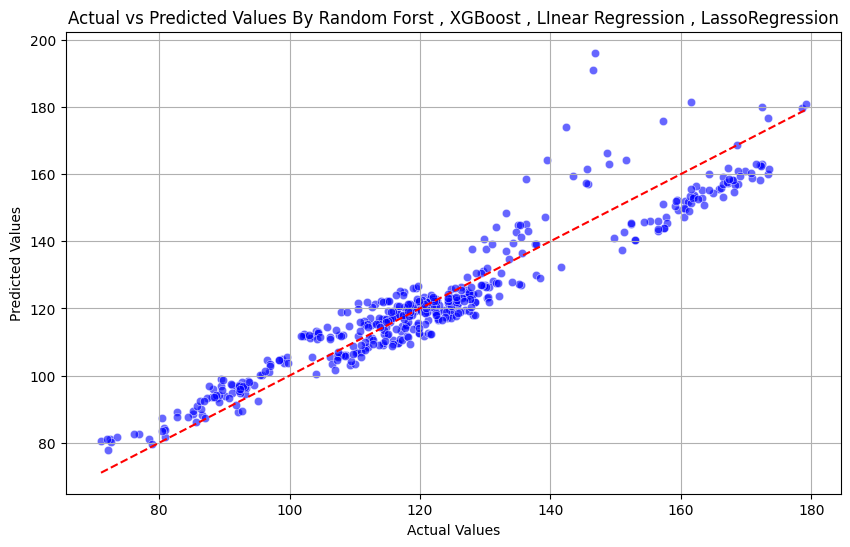

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))

sns.scatterplot(data=results, x='Actual', y='Predicted', color='blue', alpha=0.6)

# Line for perfect prediction
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--')
plt.title('Actual vs Predicted Values By Random Forst , XGBoost , LInear Regression , LassoRegression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()
